<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-04-04 19:44:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  40.7MB/s    in 0.9s    

2024-04-04 19:44:04 (40.7 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT *
FROM sqlite_master;
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY, conn)
df.head()

,type,name,tbl_name,rootpage,sql
0,table,EduOther,EduOther,2,"CREATE TABLE ""EduOther"" (\n""Respondent"" INTEGE..."
1,table,DevType,DevType,741,"CREATE TABLE ""DevType"" (\n""Respondent"" INTEGER..."
2,table,LastInt,LastInt,1024,"CREATE TABLE ""LastInt"" (\n""Respondent"" INTEGER..."
3,table,JobFactors,JobFactors,1355,"CREATE TABLE ""JobFactors"" (\n""Respondent"" INTE..."
4,table,WorkPlan,WorkPlan,1808,"CREATE TABLE ""WorkPlan"" (\n""Respondent"" INTEGE..."


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`

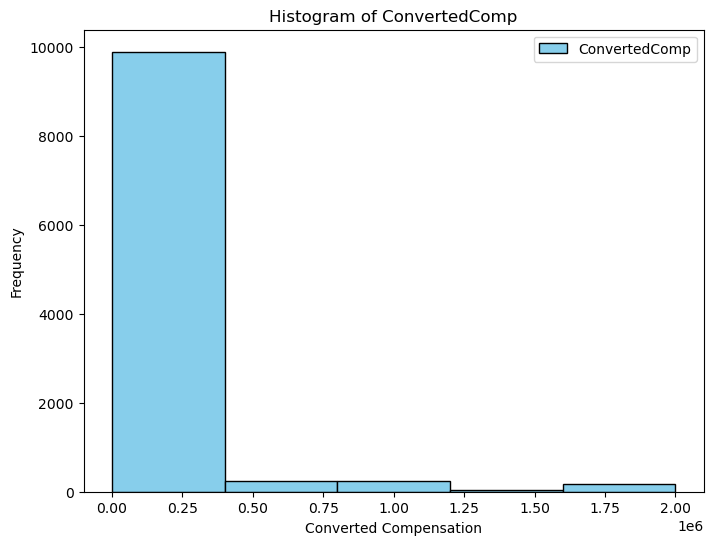

In [10]:
# your code goes here
import matplotlib.pyplot as plt

# Plotting the histogram
data_c.plot(kind='hist',figsize=(8, 6),bins=5, color='skyblue', edgecolor='black') 
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()


In [9]:
Query1="""
select ConvertedComp from master """
data_c=pd.read_sql_query(Query1,conn)
data_c

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
11393,130000.0
11394,19880.0
11395,105000.0
11396,80371.0


### Box Plots


Plot a box plot of `Age.`


In [30]:
# your code goes here

Query2="""
select Age from master """
data=pd.read_sql_query(Query2,conn)
data

,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0
...,...
11393,36.0
11394,25.0
11395,34.0
11396,25.0


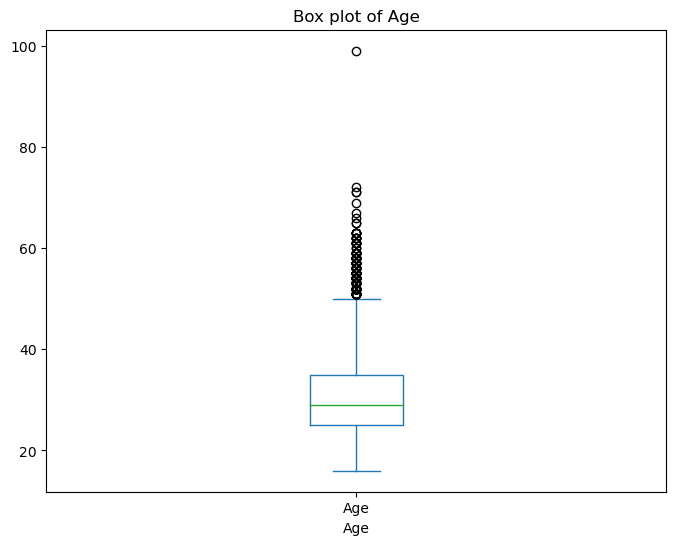

In [31]:
data.plot(kind='box',figsize=(8,6))
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [12]:
# your code goes here


Query3="""
select Age,WorkWeekHrs from master """
data_w=pd.read_sql_query(Query3,conn)
data_w

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0
...,...,...
11393,36.0,40.0
11394,25.0,40.0
11395,34.0,40.0
11396,25.0,42.5


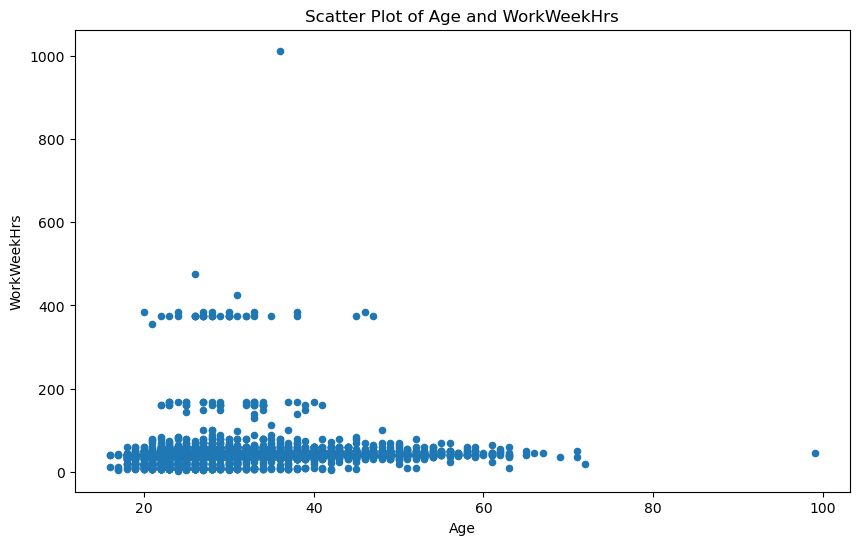

In [13]:
# Add labels and title
data_w.plot(kind='scatter',x='Age',y='WorkWeekHrs',figsize=(10,6))
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [14]:
# your code goes here
Query4="""
select Age,WorkWeekHrs,CodeRevHrs from master """
data_wc=pd.read_sql_query(Query4,conn)
data_wc

,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0
...,...,...,...
11393,36.0,40.0,NaN
11394,25.0,40.0,5.0
11395,34.0,40.0,5.0
11396,25.0,42.5,2.0


In [15]:
data_wc.shape

(11398, 3)

In [ ]:
data_4_new=data_wc.dropna()
data_4_new.shape

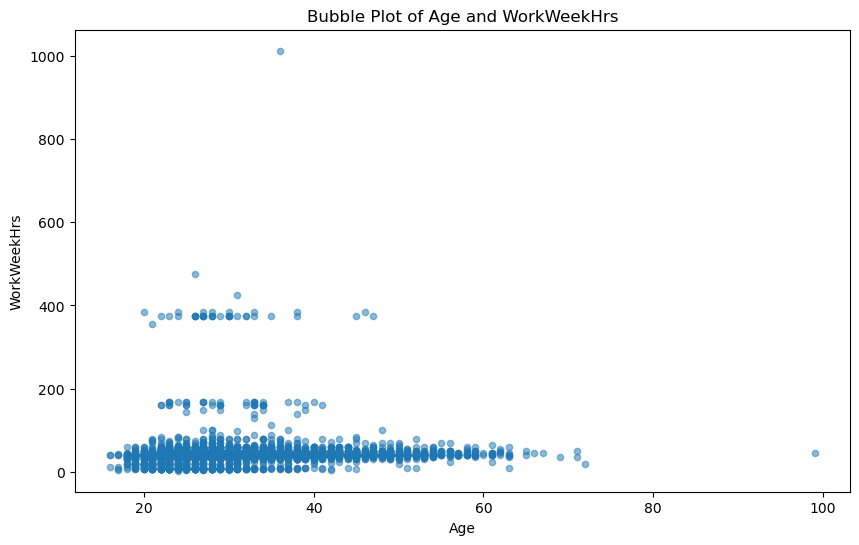

In [16]:
data_w.plot(kind='scatter',x='Age',y='WorkWeekHrs',figsize=(10,6),alpha=0.5)
plt.title('Bubble Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [17]:
# your code goes here
Query5="""
select count(*) as Num_Of_Resp,DatabaseDesireNextYear from DatabaseDesireNextYear group by DatabaseDesireNextYear order by count(*) desc limit 5"""
data_5 = pd.read_sql_query(Query5,conn)
data_5

,Num_Of_Resp,DatabaseDesireNextYear
0,4328,PostgreSQL
1,3649,MongoDB
2,3331,Redis
3,3281,MySQL
4,2856,Elasticsearch


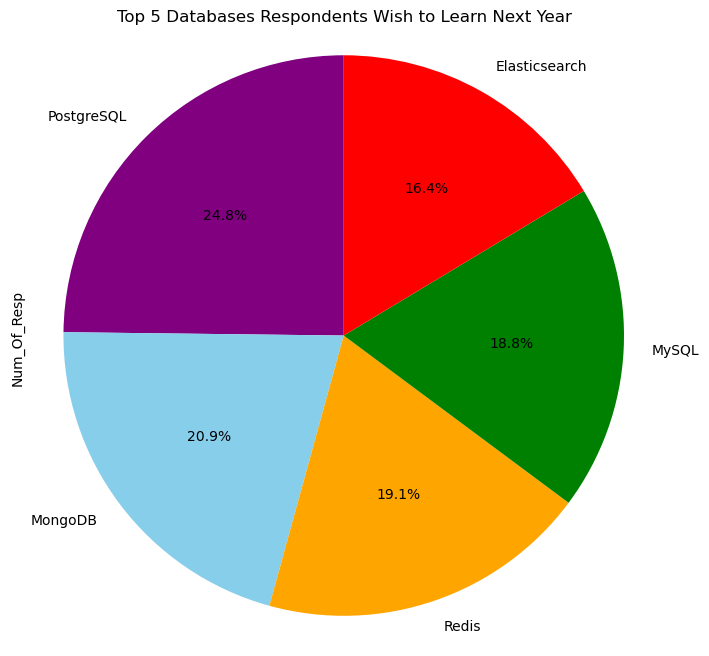

In [18]:
data_5['Num_Of_Resp'].plot(kind='pie',
                           figsize=(8,8),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=False,
                           labels=data_5['DatabaseDesireNextYear'],
                           colors=['purple','skyblue','orange','green','red'])
# Add title
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
# Show plot
plt.axis('equal')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [19]:
# your code goes here
Query6 = """
select WorkWeekHrs,CodeRevHrs, Age
from master
where Age >=30 and Age <=35
"""
data_6_1=pd.read_sql_query(Query6,conn)
data_6 = data_6_1.groupby('Age').median()
data_6


,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0
35.0,40.0,4.0


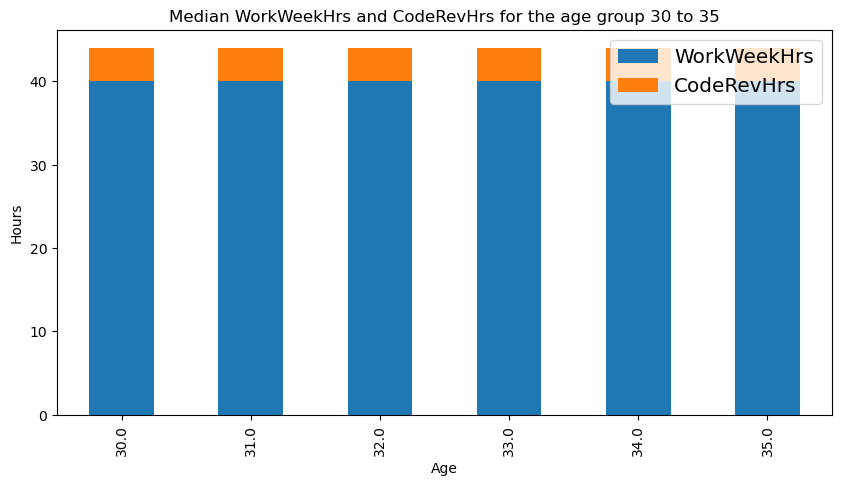

In [20]:
# Create stacked bar chart
data_6.plot(kind='bar',
            figsize=(10,5),
            stacked=True)

plt.title('Median WorkWeekHrs and CodeRevHrs for the age group 30 to 35')
plt.ylabel('Hours')
plt.legend(loc = 'upper right', fontsize='x-large')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [21]:
# your code goes here
# your code goes here

Query7 = """
select ConvertedComp,Age from master
where Age between 45 and 60"""

data_7_1=pd.read_sql_query(Query7,conn)
data_7=data_7_1.groupby('Age').median()
data_7

,ConvertedComp
Age,
45.0,90330.0
46.0,91593.0
47.0,91606.0
48.0,105750.0
49.0,85248.0
50.0,95000.0
51.0,100000.0
52.0,105500.0
53.0,100463.0


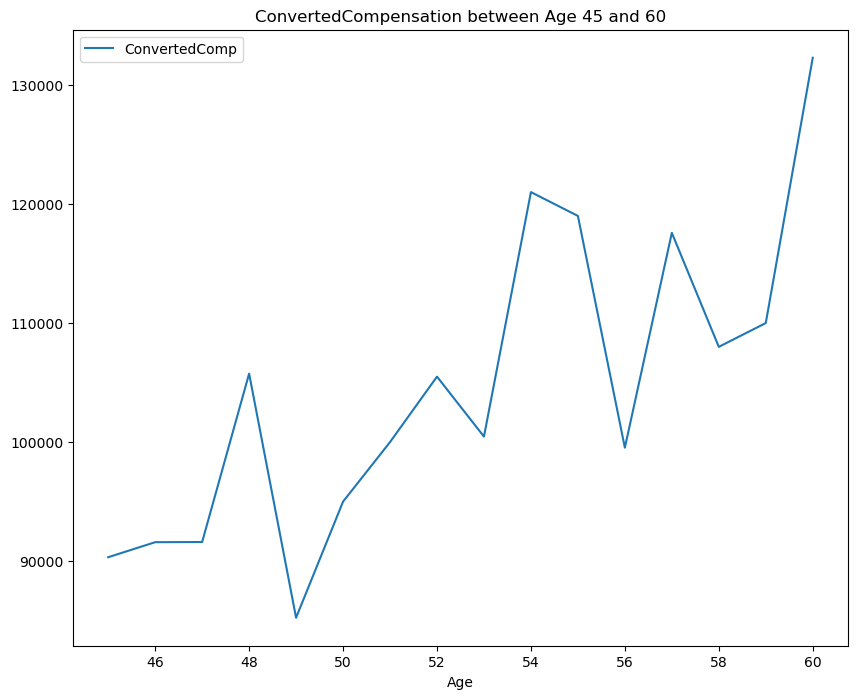

In [22]:
data_7.plot(kind='line',
           figsize=(10,8))
plt.title('ConvertedCompensation between Age 45 and 60')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:>

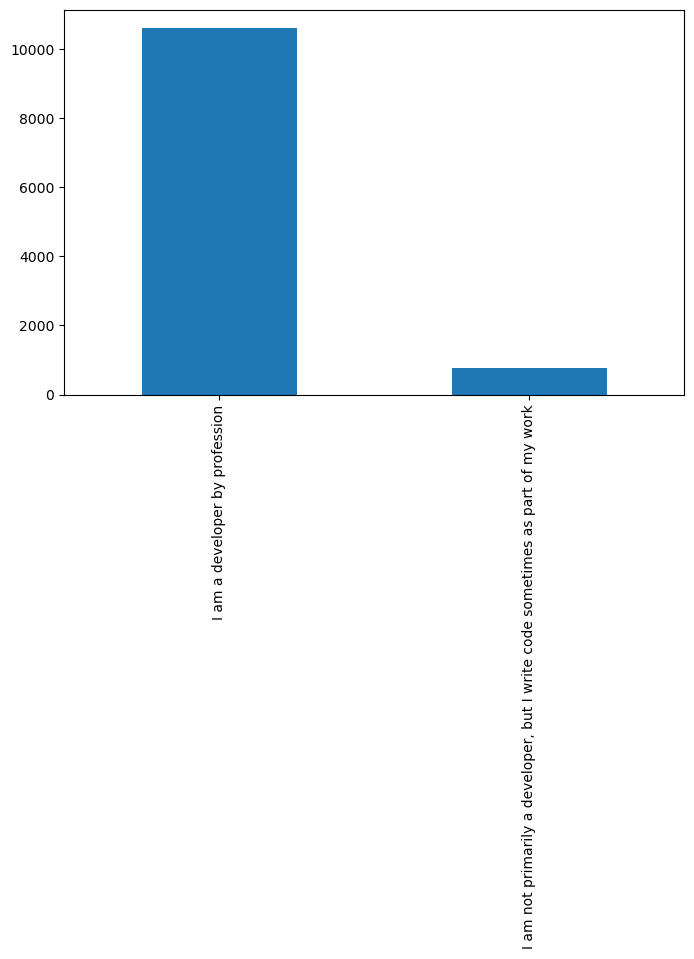

In [23]:
# your code goes here

Query8="""
select MainBranch from master"""

data_8=pd.read_sql_query(Query8,conn)
data_8['MainBranch'].value_counts().plot(kind='bar',figsize=(8,5))

Close the database connection.


In [32]:
conn.close()

In [24]:
# your code goes here
Query5="""
select *
from DatabaseWorkedWith 
"""
data_5 = pd.read_sql_query(Query5,conn)
data_5

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite
...,...,...
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server
31373,25141,Redis


In [25]:
# your code goes here
Query5="""
select count(DISTINCT Respondent) as Num_Of_Resp,DevType 
from DevType

group by DevType
order by count(*) desc"""
data_5 = pd.read_sql_query(Query5,conn)
data_5

,Num_Of_Resp,DevType
0,6928,"Developer, full-stack"
1,6290,"Developer, back-end"
2,3920,"Developer, front-end"
3,2575,"Developer, desktop or enterprise applications"
4,1959,"Developer, mobile"
5,1639,DevOps specialist
6,1413,Database administrator
7,1202,System administrator
8,988,Designer
9,911,"Developer, QA or test"


In [26]:
# your code goes here
Query5="""
select count(DISTINCT Respondent) as Num_Of_Resp,LanguageWorkedWith 
from LanguageWorkedWith

group by LanguageWorkedWith
order by count(*) desc"""
data_5 = pd.read_sql_query(Query5,conn)
data_5

,Num_Of_Resp,LanguageWorkedWith
0,8687,JavaScript
1,7830,HTML/CSS
2,7106,SQL
3,4642,Bash/Shell/PowerShell
4,4542,Python
5,4506,Java
6,4288,C#
7,3232,TypeScript
8,2913,PHP
9,1946,C++


In [27]:
# your code goes here
# your code goes here

Query7 = """
select ConvertedComp,Age from master
where Age between 25 and 30"""

data_7_1=pd.read_sql_query(Query7,conn)
data_7=data_7_1.groupby('Age').median()
data_7.head(5)

,ConvertedComp
Age,
25.0,39920.0
26.0,43834.0
27.0,49620.0
28.0,51559.0
29.0,55674.0


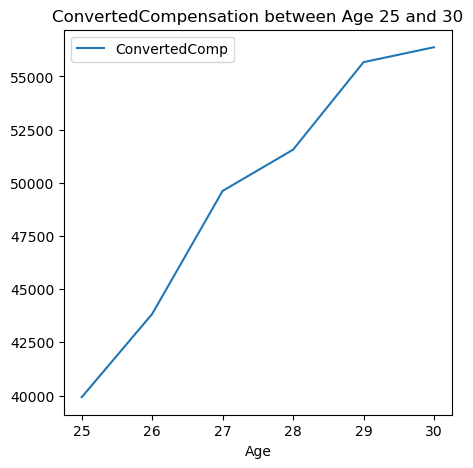

In [28]:
data_7.plot(kind='line',
           figsize=(5,5))
plt.title('ConvertedCompensation between Age 25 and 30')
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
